In [1]:
#MOVIE LENS PROJECT ANALYSIS

In [2]:
#1. Prepare Problem

In [3]:
# a) Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# b) Load dataset
movie_data = pd.read_csv("movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
users_data = pd.read_csv("users.dat", sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("ratings.dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

In [5]:
#2. Summarize Data

In [6]:
# Descriptive statistics on movie_data
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movie_data.shape

(3883, 3)

In [8]:
movie_data.isnull().sum()
# Results show that no columns are empty or null

MovieID    0
Title      0
Genres     0
dtype: int64

In [9]:
movie_data.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [10]:
# On users data
users_data.shape

(6040, 5)

In [11]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
users_data.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [13]:
users_data.isnull().sum()
# Results show that no columns are empty or null

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [14]:
#Gender Distribution

In [15]:
gender_group = users_data.groupby('Gender').size()
gender_group

Gender
F    1709
M    4331
dtype: int64

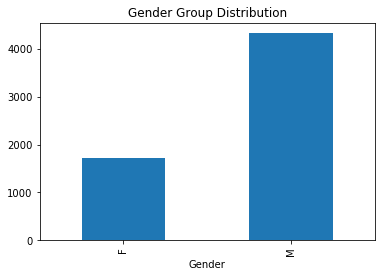

In [16]:
gender_group.plot(kind='bar', title='Gender Group Distribution')
plt.show("Male" , "Female")

In [17]:
#The above distribution shows that most of the users are Male

In [18]:
# On Ratings data
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [21]:
ratings_data.shape

(1000209, 4)

In [22]:
ratings_data.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [23]:
ratings_data.isnull().sum()
# Results show that no columns are empty or null

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [24]:
#User Ratings
user_group = ratings_data.groupby(['UserID']).size()
user_group.head()

UserID
1     53
2    129
3     51
4     21
5    198
dtype: int64

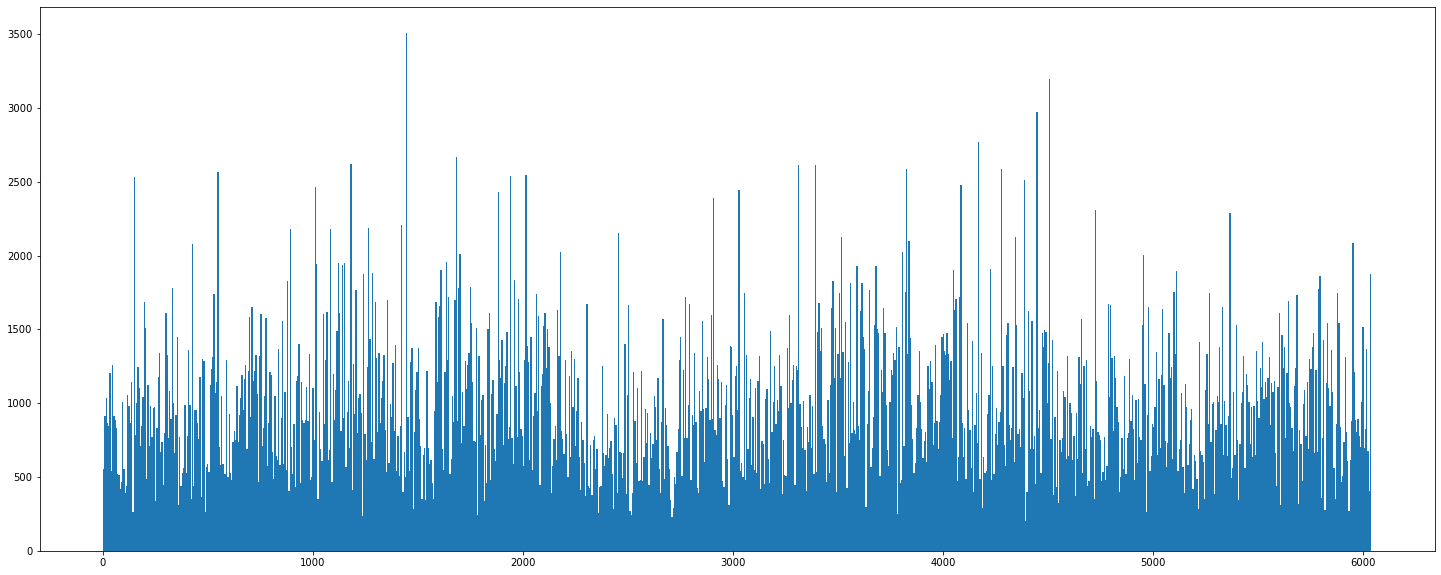

In [25]:
plt.figure(figsize=(25,10))
plt.hist(x=[ratings_data.UserID], bins=1000)
plt.show()

In [26]:
#Merging

In [27]:
user_ratings = pd.merge(users_data,ratings_data , how = 'inner', on = 'UserID')

In [28]:
user_ratings = user_ratings.drop('Timestamp' , axis=1)
user_ratings = user_ratings.drop('Zip-code' , axis=1)

In [29]:
user_ratings.head()

,UserID,Gender,Age,Occupation,MovieID,Rating
0,1,F,1,10,1193,5
1,1,F,1,10,661,3
2,1,F,1,10,914,3
3,1,F,1,10,3408,4
4,1,F,1,10,2355,5


In [30]:
#Now creating Master_DataSet by merging user_rating to movie_data on MovieID

In [31]:
Master_Data = pd.merge(movie_data,user_ratings, how = 'inner', on = 'MovieID')

In [32]:
Master_Data.shape

(1000209, 8)

In [33]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,4
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,4
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,5


In [34]:
Master_Data.describe()

,MovieID,UserID,Age,Occupation,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00


In [35]:
Master_Data.isnull().sum()
# Results show that no columns are empty or null

MovieID       0
Title         0
Genres        0
UserID        0
Gender        0
Age           0
Occupation    0
Rating        0
dtype: int64

In [36]:
#3. Data Visualizations

In [37]:
#User Age Distribution

In [38]:
age_group = Master_Data.groupby('Age').size()
age_group

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

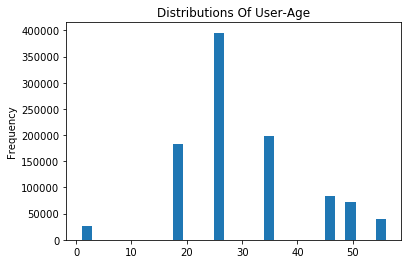

In [39]:
Master_Data.Age.plot.hist(bins=30)
plt.title('Distributions Of User-Age')
plt.show()

In [40]:
#The above age distribution shows that most of the users are 25 years old

In [41]:
#User rating of the movie “Toy Story”
Toy_Story_Rating = Master_Data[Master_Data.Title == "Toy Story (1995)"]

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

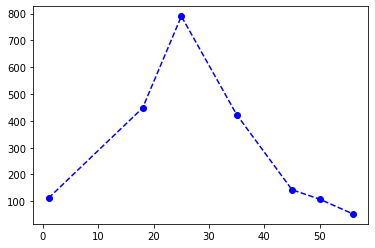

In [42]:
plt.plot(Toy_Story_Rating.groupby("Age")["MovieID"].count(),'--bo')
Toy_Story_Rating.groupby("Age")["MovieID"].count()

In [43]:
#The above plot shows that the Toystory movie is more popular for viewers between Age group 20-25 years

In [44]:
#Top 25 movies by viewership rating

In [45]:
movie_rating = Master_Data.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
Top_Movies = Master_Data.groupby("Title").size().sort_values(ascending=False)[:25]
Top_Movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

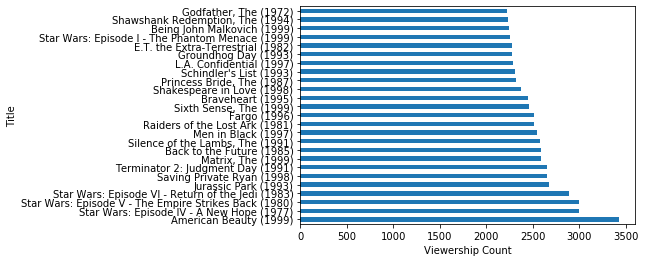

In [46]:
plt.ylabel("Title")
plt.xlabel("Viewership Count")
Top_Movies.plot(kind="barh")

In [47]:
#In Top 25 Movies "American Beauty is the winner"

In [48]:
#Rating of userid = 2696

In [49]:
user_rating_data = Master_Data[Master_Data['UserID']==2696]
user_rating_data.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Rating
95261,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,M,25,7,3
200536,800,Lone Star (1996),Drama|Mystery,2696,M,25,7,5
270342,1092,Basic Instinct (1992),Mystery|Thriller,2696,M,25,7,4
274576,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,M,25,7,3
349333,1258,"Shining, The (1980)",Horror,2696,M,25,7,4


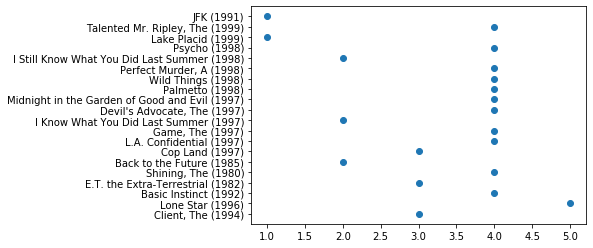

In [50]:
# plotting the above data
res = user_rating_data
plt.scatter(y=res.Title, x=res.Rating)

In [51]:
#3. Prepare Data

In [52]:
few_viewership = Master_Data.head(500)
few_viewership.shape

(500, 8)

In [53]:
#preprocess data

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(few_viewership['Age'])
x_age = le.transform(few_viewership['Age'])
x_age

array([0, 5, 2, 2, 3, 1, 0, 1, 3, 2, 2, 1, 2, 1, 4, 4, 2, 1, 0, 3, 5, 3,
       1, 1, 0, 3, 4, 6, 6, 1, 2, 0, 4, 2, 2, 2, 3, 0, 3, 3, 1, 2, 2, 1,
       2, 2, 3, 1, 5, 2, 3, 2, 1, 4, 3, 1, 1, 5, 2, 2, 2, 1, 1, 2, 1, 4,
       2, 4, 0, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 4, 2, 2, 2, 2, 1, 2, 1,
       3, 2, 2, 3, 1, 1, 1, 2, 6, 4, 2, 2, 1, 1, 1, 5, 2, 1, 6, 1, 5, 5,
       3, 3, 1, 3, 2, 3, 2, 4, 1, 1, 1, 5, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 4, 3, 2, 2, 2, 3, 2, 2, 1, 1, 4, 3, 1, 6, 6, 1, 3, 1, 2,
       3, 2, 5, 2, 2, 0, 1, 1, 1, 2, 2, 6, 3, 5, 1, 1, 3, 1, 2, 2, 2, 1,
       2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 4, 3, 2, 2, 1, 2, 3, 2, 1, 1, 0, 2,
       3, 3, 5, 1, 2, 2, 1, 3, 0, 3, 3, 0, 6, 3, 3, 3, 3, 6, 4, 4, 1, 3,
       2, 1, 2, 3, 2, 2, 3, 2, 2, 5, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 1, 1,
       0, 3, 2, 2, 3, 4, 3, 2, 1, 0, 3, 0, 1, 3, 2, 0, 3, 3, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 4, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 3, 3, 0, 1, 2, 3, 1, 3, 0,

In [55]:
le.fit(few_viewership['Occupation'])
x_occ = le.transform(few_viewership['Occupation'])
x_occ

array([10,  9, 12, 17,  1,  3, 10, 16,  0,  7,  1,  0,  3,  4, 17, 16,  4,
       12, 10, 20,  1, 12,  4,  4, 10,  7,  1,  1, 13,  4, 16, 10, 15, 16,
        2, 17, 17, 10,  7,  9,  4, 17,  0,  2, 20,  7, 20,  4, 17,  1,  7,
       20,  4,  7, 16,  4,  4,  0,  7,  0,  2, 17,  4,  0,  5,  1, 17, 15,
       10, 12, 12,  4,  7,  4, 20, 14, 12, 17,  4,  7,  1,  3, 20,  5,  6,
       19, 16,  4,  0,  7,  7,  0,  4,  0,  4, 12,  1,  9, 12,  7,  4,  4,
        0, 16,  2,  4,  9,  4,  3, 11,  7,  2, 19,  7,  3,  3,  0, 20,  4,
        4,  3, 15,  0,  1,  4,  1,  0,  2,  6,  0,  6,  7,  5, 11,  4,  1,
       15, 11,  0,  3,  1, 17, 12,  4,  0,  3, 17, 11,  0, 13,  4,  0, 16,
        7,  3, 17, 16, 12, 14, 10,  4, 10,  4,  1,  2, 14, 14,  7,  0, 17,
       12, 14, 12, 20,  2,  4,  5,  0,  6,  8,  4,  9,  4, 17, 19, 12, 15,
        0,  5,  0,  1, 11,  6,  7, 20,  4, 10,  4,  0, 20, 17,  0, 17,  1,
        4,  0, 10, 14, 17, 10, 17, 12,  0, 20,  7, 13, 16, 16,  4, 18, 17,
       16,  0,  7,  4, 12

In [56]:
le.fit(few_viewership['MovieID'])
x_movieid = le.transform(few_viewership['MovieID'])
x_movieid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New MovieID'] = x_movieid

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [58]:
# Feature Selection
x_input = few_viewership[['New Age','New Occupation','New MovieID']]
y_target = few_viewership['Rating']

In [59]:
x_input.head()

,New Age,New Occupation,New MovieID
0,0,10,0
1,5,9,0
2,2,12,0
3,2,17,0
4,3,1,0


In [60]:
#4. Evaluate Algorithms
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [61]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [63]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

In [64]:
result = logitReg.predict(x_test)

In [65]:
estimated = pd.Series(result, name='Estimated Values')

In [66]:
final_result = pd.concat([y_test, estimated], axis=1)

In [67]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.408
[[ 0  0  0  2]
 [ 0  0 13 10]
 [ 0  0 30 24]
 [ 0  0 25 21]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        23
           4       0.44      0.56      0.49        54
           5       0.37      0.46      0.41        46

    accuracy                           0.41       125
   macro avg       0.20      0.25      0.22       125
weighted avg       0.33      0.41      0.36       125



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# Plot the histogram
plt.figure(figsize=(20,10))
plt.hist(x=x_input)
plt.legend()
plt.show()

In [68]:
#Accuracy of the above matrix is 40.8 %

In [69]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.388905 (0.051216)
LDA: 0.396799 (0.049448)
KNN: 0.336273 (0.081244)
CART: 0.343741 (0.066058)


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warn

NB: 0.349289 (0.058171)
SVM: 0.389047 (0.053864)


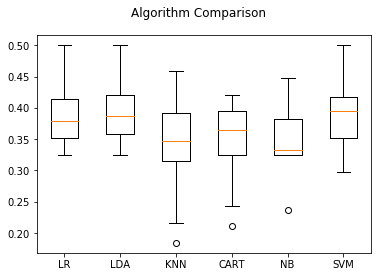

In [70]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [81]:
#From the above plot we see that SVM gives the most accurate results